<a href="https://colab.research.google.com/github/bnarath/TF_Developer/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

# Notes

- Use cases
  - Classification
  - Object detection (Where is the thing we are looking for?)

- Computer Vision Inputs & Outputs
  - Numerical encoded version of images 
    - [batch_size, height, width, #color_channels]
  - Outputs
    - Multi class
      - Predicted probs for each class [#num classes]

- What is CNN ?
  - Components
    1. Kernel (k, of width=height)
    1. Filters (# of kernels)
    1. Input channels (# of channels prior to convolution)
    1. Output channels (# of channels after convolution = #of filters of kernel)
    1. If (w, h, #c) is the input and (k, k, f) is the kernel X filters, then, each kernel is convolved with each channel of the input simultaneouly, then gets added and produce, ceil((w - k + 2p +1)/s) + 1, ceil((h - k + 2p +1)/s) + 1, for each filter. Here, p is padding and s is stride.
    1. The weights = kxkxf
    1. Pooling is nothing but some kind of aggregation. It also use a pool size (similar to kernel size), and stride. Pooling doesn't change the # output channels. #output channels = #input channels

# Pizza Steak Structure

## Data

- Structure
```
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

- Download
  ```
  from zipfile import ZipFile

  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  zip_ref = ZipFile('pizza_steak.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

  ```

- Visualize
  matplotlib.image.imread reads image file and converts that into numpy array
  ```
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  import random

  def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    print(f"Image shape: {img.shape}")

    return img
  ```

- Augmentation
```
  train_datagen_augment = ImageDataGenerator(rescale=1/255.,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=5.0,
                                    rotation_range=20,
                                    horizontal_flip=True)

  test_datagen = ImageDataGenerator(rescale=1/255.)

  train_data_augmented = train_datagen_augment.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode='categorical',
                                                                  batch_size=32,
                                                                  shuffle=True)

  test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          class_mode='categorical',
                                          batch_size=32,
                                          shuffle=False)                                                
```


- Model
```
  model_10 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(len(class_names), activation="softmax")])
       
  model_10.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  model_11 = tf.keras.models.clone_model(model_10)
  model_11.compile(loss = "categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  history_11 = model_11.fit(train_data_augmented,
              validation_data=test_data,
              steps_per_epoch=len(train_data_augmented),
              validation_steps=len(test_data),
              epochs=5)
```

- Inference processing & Prediction 

```
  def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, size=(img_shape, img_shape))
    img = img/255.
    return img

  def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, 0))
    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    

  pred_and_plot(model=model_11, 
                filename="03-steak.jpeg", 
                class_names=class_names)
```

- Save & Load model

```
  model_11.save("saved_trained_model")
  loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
```


In [ ]:
from zipfile import ZipFile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-02-06 18:16:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.208, 172.217.13.112, 172.217.13.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  74.8MB/s    in 1.4s    

2023-02-06 18:16:10 (74.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Experiment with dataset

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))
num_pizza_images_train=len(os.listdir('pizza_steak/train/pizza'))
num_steak_images_test=len(os.listdir('pizza_steak/test/steak'))
num_pizza_images_test=len(os.listdir('pizza_steak/test/pizza'))

In [ ]:
num_steak_images_train, num_pizza_images_train, num_steak_images_test, num_pizza_images_test

(750, 750, 250, 250)

# Get the class names programmatically

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = sorted([item.name for item in data_dir.glob('*')])

# Visualize random images from both classes

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


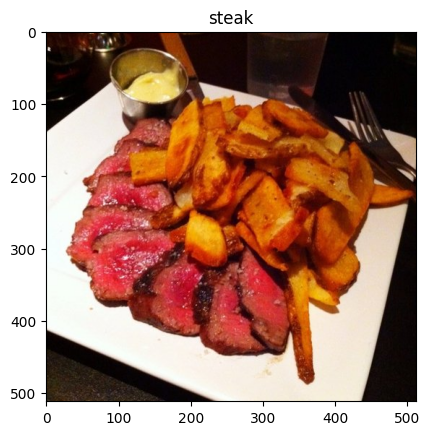

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 287, 3)


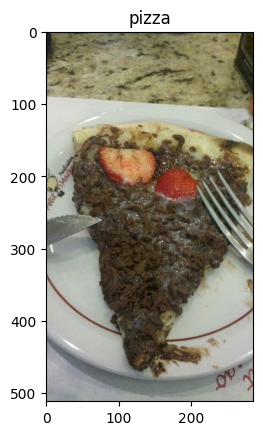

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img).shape

2023-02-06 18:18:45.801819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 18:18:45.929153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 18:18:45.930976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 18:18:45.934886: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

TensorShape([512, 287, 3])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
save_train_dir = "train_save/"
save_test_dir = "test_save/"

train_data = train_datagen.flow_from_directory(train_dir,
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode="binary",
                                  seed=42)


valid_data = test_datagen.flow_from_directory(test_dir,
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode="binary",
                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history_1 = model_1.fit(train_data, 
            epochs=5,
            verbose=1,
            validation_data=valid_data,
            steps_per_epoch=len(train_data),
            validation_steps=len(valid_data))




Epoch 1/5


2023-02-06 18:19:17.606187: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


47/47 [==============================] - 14s 123ms/step - loss: 0.5660 - accuracy: 0.6980 - val_loss: 0.3764 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4089 - accuracy: 0.8087 - val_loss: 0.4106 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 102ms/step - loss: 0.3830 - accuracy: 0.8227 - val_loss: 0.3314 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.3516 - accuracy: 0.8487 - val_loss: 0.3761 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3206 - accuracy: 0.8720 - val_loss: 0.3081 - val_accuracy: 0.8780


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Use MLP to train the pizza staek classification

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    validation_data=valid_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 5s 100ms/step - loss: 1.6234 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


# Improvise MLP 

- Increase hidden layers
- Increase hidden units

In [ ]:
tf.random.set_seed(42)


model_3 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_3.fit(train_data,
            epochs=5,
            validation_data=valid_data,
            steps_per_epoch=len(train_data),
            validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 5s 102ms/step - loss: 2.8958 - accuracy: 0.6567 - val_loss: 0.7546 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 5s 96ms/step - loss: 0.8284 - accuracy: 0.7033 - val_loss: 0.6932 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.9697 - accuracy: 0.7033 - val_loss: 0.4449 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 5s 96ms/step - loss: 0.4919 - accuracy: 0.7900 - val_loss: 0.4373 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 5s 96ms/step - loss: 0.4873 - accuracy: 0.7840 - val_loss: 0.6119 - val_accuracy: 0.6660


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Build a baseline model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu"
           ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_4.compile(
    loss = "binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))




Epoch 1/5
47/47 [==============================] - 6s 111ms/step - loss: 1.8148 - accuracy: 0.5833 - val_loss: 0.5065 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4825 - accuracy: 0.7807 - val_loss: 0.4194 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3846 - accuracy: 0.8433 - val_loss: 0.3933 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.2457 - accuracy: 0.9147 - val_loss: 0.5054 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.1350 - accuracy: 0.9560 - val_loss: 0.5799 - val_accuracy: 0.7640


<AxesSubplot:>

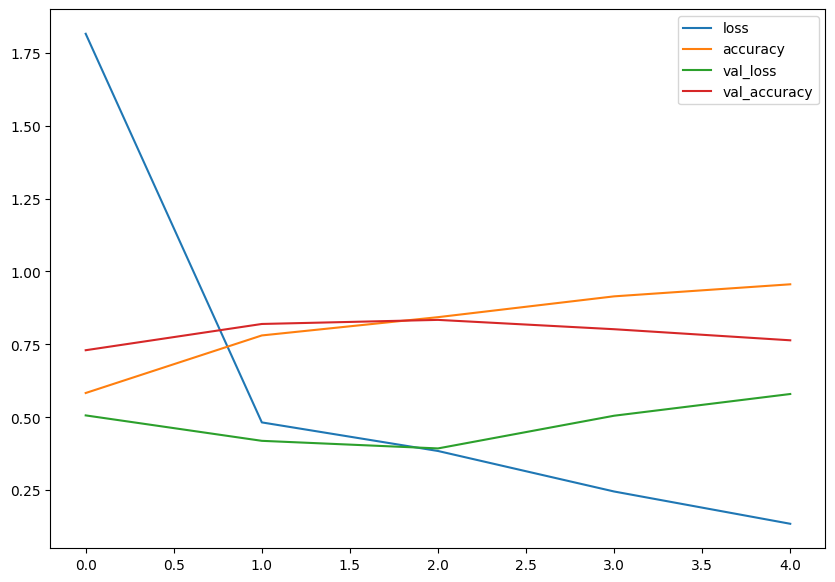

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:

# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

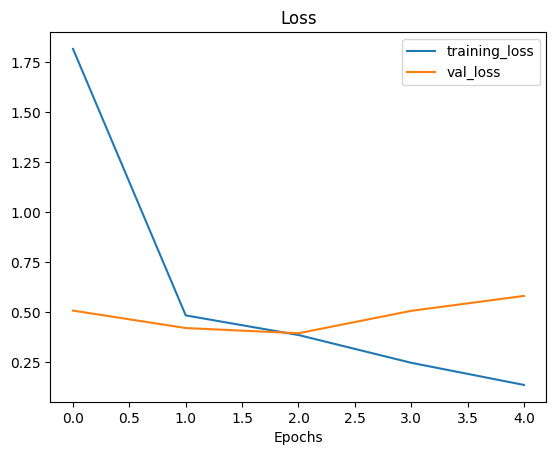

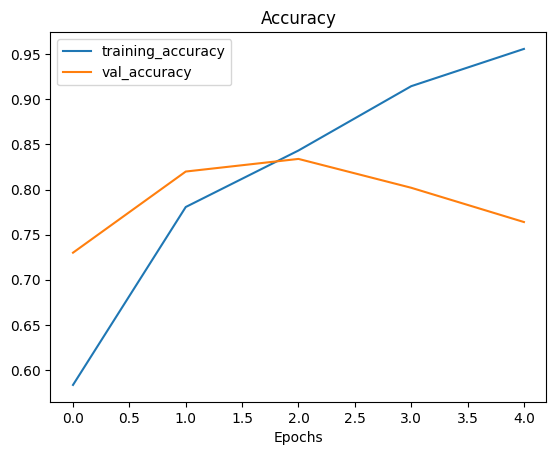

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

# Change model parameters to see if we can improvise val accuracy

- Add maxpool layers

In [ ]:
model_5 = Sequential(
    [
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
    ]
)


model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
            validation_data=valid_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6270 - accuracy: 0.6287 - val_loss: 0.4679 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 5s 97ms/step - loss: 0.4706 - accuracy: 0.7793 - val_loss: 0.3851 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 5s 98ms/step - loss: 0.4534 - accuracy: 0.7927 - val_loss: 0.3824 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 5s 96ms/step - loss: 0.4095 - accuracy: 0.8273 - val_loss: 0.3427 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 5s 100ms/step - loss: 0.3894 - accuracy: 0.8440 - val_loss: 0.4490 - val_accuracy: 0.7880


In [ ]:
model_5.evaluate(valid_data)

16/16 [==============================] - 1s 70ms/step - loss: 0.4490 - accuracy: 0.7880


[0.4490135610103607, 0.7879999876022339]

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

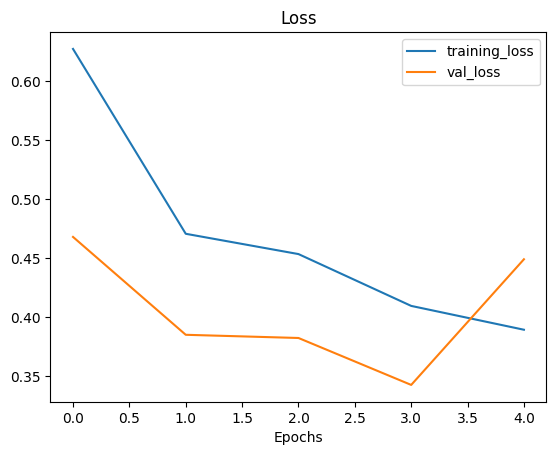

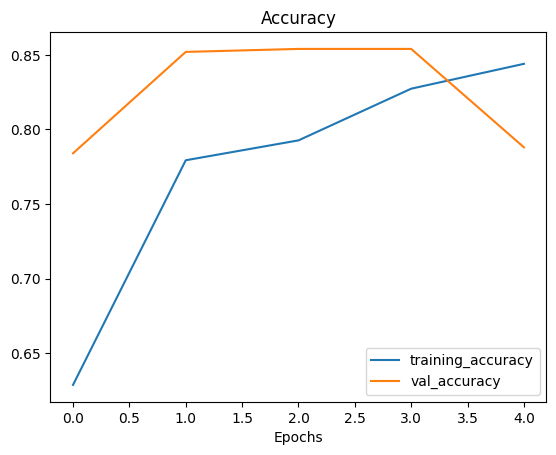

In [ ]:
plot_loss_curves(history_5)

# Incorporate data augmentation

- Augmentation is done only on train data

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=20.0,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode='binary',
                                                                  batch_size=32,
                                                                  shuffle=False)


train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32,
                                              shuffle=False)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

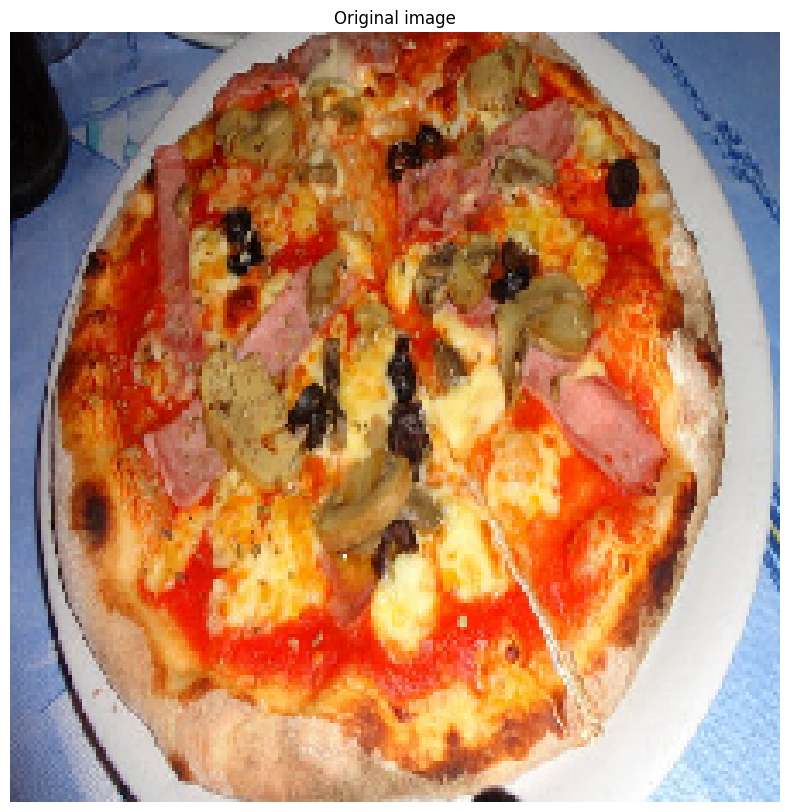

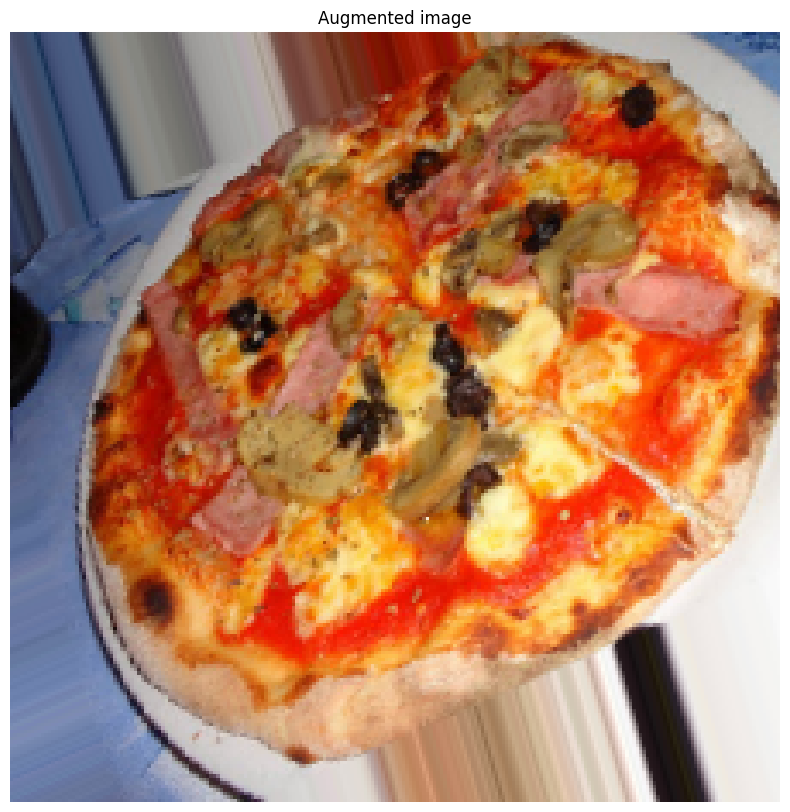

In [ ]:
random_number = random.randint(0, 32)
plt.figure(figsize=(10,10))
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure(figsize=(10,10))
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);
     

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
]
)

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data,
            validation_data=test_data,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 104ms/step - loss: 0.7117 - accuracy: 0.4960 - val_loss: 0.6893 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6993 - accuracy: 0.5387 - val_loss: 0.6797 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6939 - accuracy: 0.5780 - val_loss: 0.6823 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 5s 97ms/step - loss: 0.7076 - accuracy: 0.6300 - val_loss: 0.6892 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6720 - accuracy: 0.6787 - val_loss: 0.7083 - val_accuracy: 0.5160


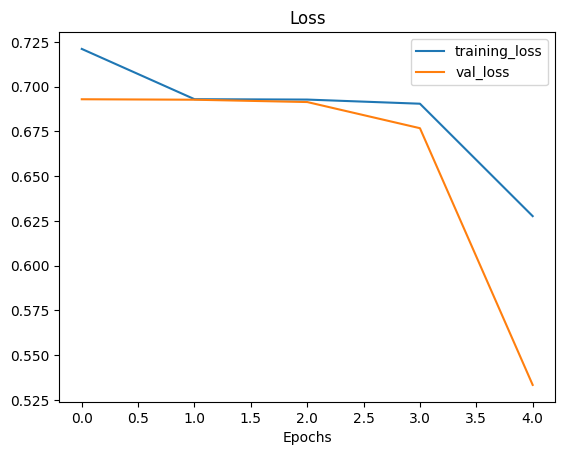

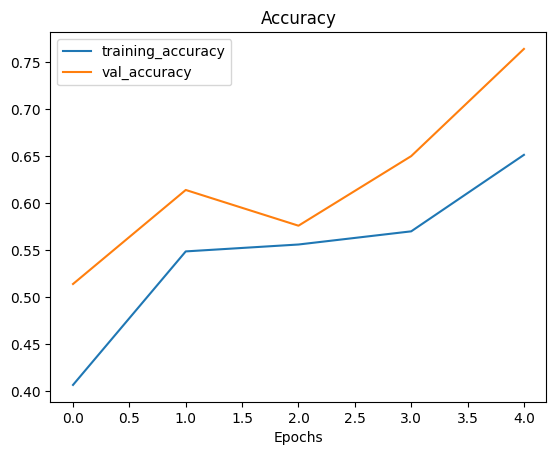

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                       rotation_range=20,
                       shear_range=20,
                       zoom_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                         target_size=(224, 224),
                                                                         class_mode='binary',
                                                                         batch_size=32,
                                                                         shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
            validation_data=test_data,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_steps=len(test_data),
            epochs=5)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 380ms/step - loss: 0.6608 - accuracy: 0.6147 - val_loss: 0.5280 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 18s 376ms/step - loss: 0.5203 - accuracy: 0.7500 - val_loss: 0.3687 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 18s 374ms/step - loss: 0.4954 - accuracy: 0.7673 - val_loss: 0.3544 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 17s 367ms/step - loss: 0.4764 - accuracy: 0.7713 - val_loss: 0.3567 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 17s 365ms/step - loss: 0.4728 - accuracy: 0.7840 - val_loss: 0.3565 - val_accuracy: 0.8520


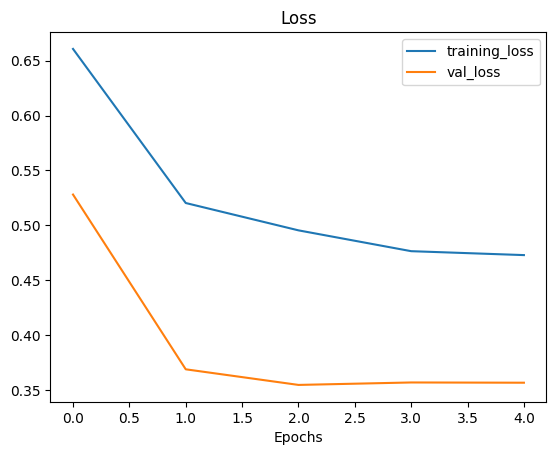

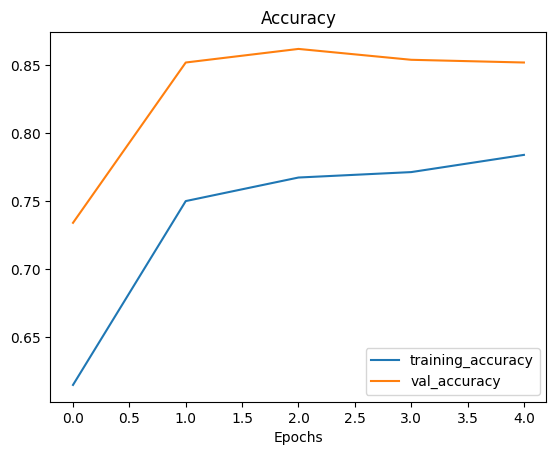

In [ ]:
plot_loss_curves(history_7)

In [ ]:
plot_loss_curves_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                   rotation_range=20,
                   shear_range=5.0,
                   zoom_range=0.2,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=True,
    seed=42
)


test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=True,
    seed=42
    
)

model_8 = Sequential([Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation="relu"),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(pool_size=2),
                     Flatten(),
                     Dense(1, activation="sigmoid")])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
            validation_data=test_data,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_steps=len(test_data),
            epochs=5)
                   

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 385ms/step - loss: 0.6290 - accuracy: 0.6453 - val_loss: 0.4297 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 18s 384ms/step - loss: 0.5464 - accuracy: 0.7433 - val_loss: 0.4560 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 18s 374ms/step - loss: 0.5093 - accuracy: 0.7567 - val_loss: 0.3750 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 18s 376ms/step - loss: 0.5073 - accuracy: 0.7573 - val_loss: 0.3928 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 18s 381ms/step - loss: 0.4928 - accuracy: 0.7660 - val_loss: 0.3562 - val_accuracy: 0.8520


In [ ]:
model_8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_38 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_40 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

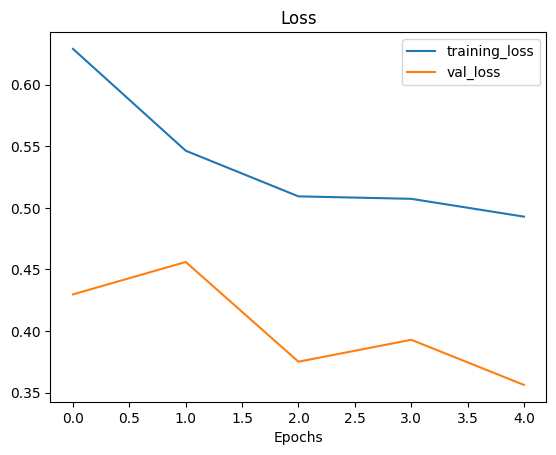

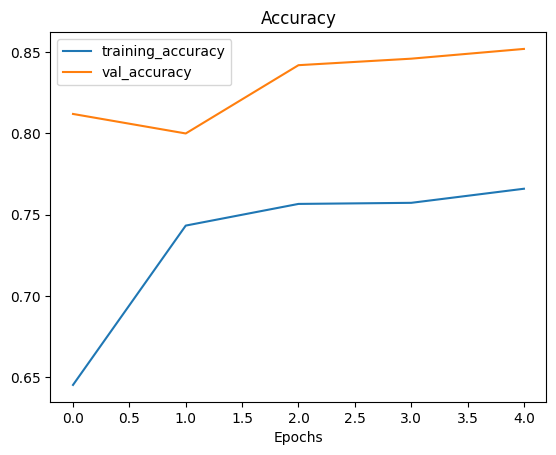

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.evaluate(test_data)

16/16 [==============================] - 1s 71ms/step - loss: 0.3562 - accuracy: 0.8520


[0.35617467761039734, 0.8519999980926514]

# Making a prediction with our trained model

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-07 02:45:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-02-07 02:45:10 (42.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(4032, 3024, 3)

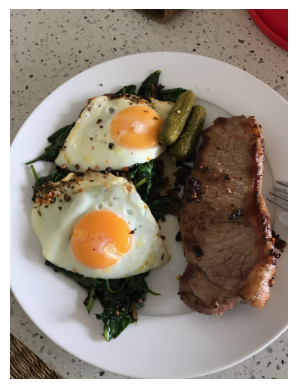

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);
steak.shape

In [ ]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, size=(img_shape, img_shape))
    img = img/255.
    return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, 0))

In [ ]:
pred

array([[0.84417504]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]

In [ ]:
pred_class

'steak'

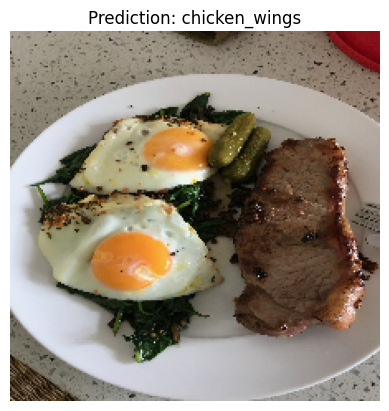

In [ ]:
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, 0))
    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-02-07 02:45:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-02-07 02:45:17 (59.5 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



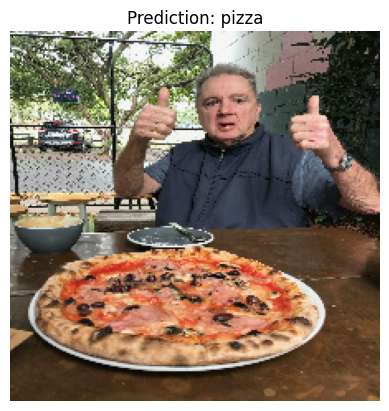

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification

## 1. Import Data and inspect

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-02-07 02:49:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  53.5MB/s    in 9.6s    

2023-02-07 02:49:47 (51.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
from zipfile import ZipFile
zip_ref = ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names=sorted([item.name for item in data_dir.glob('*')])

Image shape: (512, 512, 3)


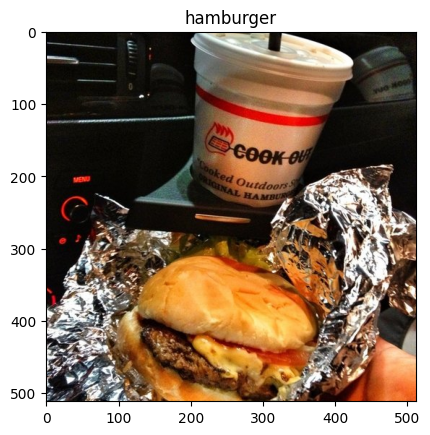

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name
     


## 2.Preprocess the data (prepare it for the model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.)

train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(224, 224),
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=True)

test_data = datagen.flow_from_directory(test_dir,
                                         target_size=(224, 224),
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=False)
                                         
    

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
train_data.class_indices

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

## 3. Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")])
    
    
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
            validation_data=test_data,
            steps_per_epoch=len(train_data),
            validation_steps=len(test_data),
            epochs=5)

Epoch 1/5
235/235 [==============================] - 24s 102ms/step - loss: 2.1209 - accuracy: 0.2316 - val_loss: 1.9492 - val_accuracy: 0.3060
Epoch 2/5
235/235 [==============================] - 24s 103ms/step - loss: 1.8576 - accuracy: 0.3651 - val_loss: 1.8809 - val_accuracy: 0.3448
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 1.5301 - accuracy: 0.4908 - val_loss: 2.0639 - val_accuracy: 0.2972
Epoch 4/5
235/235 [==============================] - 24s 100ms/step - loss: 1.0214 - accuracy: 0.6676 - val_loss: 2.4684 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 23s 99ms/step - loss: 0.4827 - accuracy: 0.8460 - val_loss: 3.1085 - val_accuracy: 0.2760


## 4. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 3.1085 - accuracy: 0.2760


[3.1085004806518555, 0.2759999930858612]

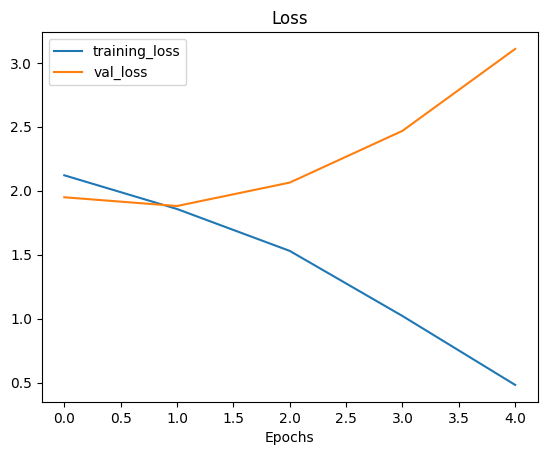

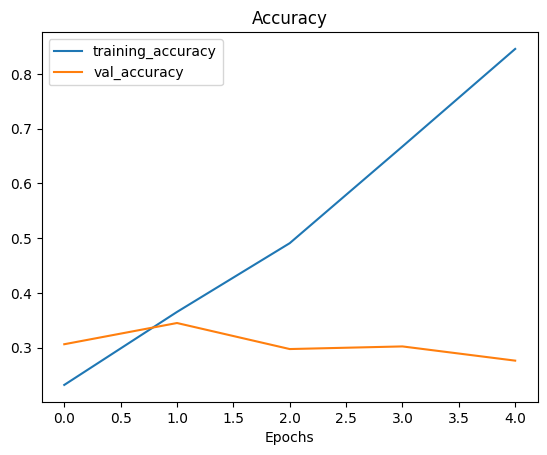

In [ ]:

# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

## 5. Improvise model

Overfitting is observed

- Simplify the model
- Use augmentation
- Use transfer learning


In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")])
    
    
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data,
            validation_data=test_data,
            steps_per_epoch=len(train_data),
            validation_steps=len(test_data),
            epochs=5)

Epoch 1/5
235/235 [==============================] - 24s 99ms/step - loss: 2.2574 - accuracy: 0.2277 - val_loss: 1.9813 - val_accuracy: 0.3028
Epoch 2/5
235/235 [==============================] - 23s 100ms/step - loss: 1.8866 - accuracy: 0.3401 - val_loss: 1.9018 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 23s 99ms/step - loss: 1.7275 - accuracy: 0.4197 - val_loss: 1.8615 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 23s 99ms/step - loss: 1.5190 - accuracy: 0.4876 - val_loss: 1.8795 - val_accuracy: 0.3428
Epoch 5/5
235/235 [==============================] - 23s 98ms/step - loss: 1.2335 - accuracy: 0.5953 - val_loss: 1.9798 - val_accuracy: 0.3208


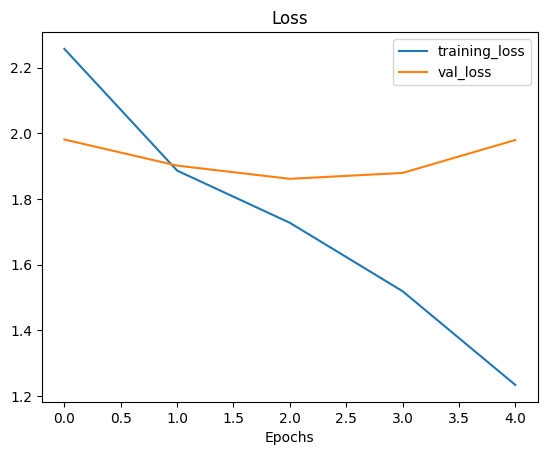

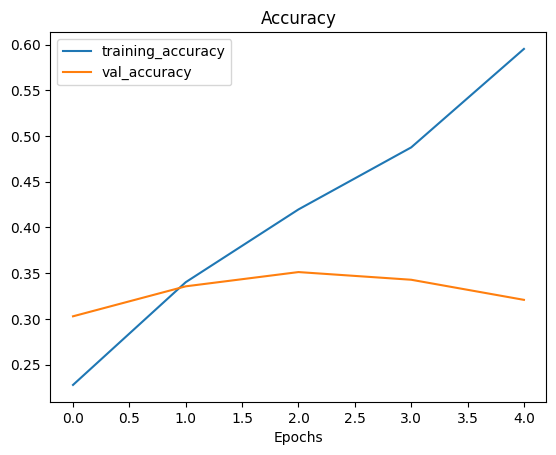

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_9.evaluate(test_data), model_10.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.9798 - accuracy: 0.3208


([3.1085004806518555, 0.2759999930858612],
 [1.9798338413238525, 0.3208000063896179])

In [ ]:
train_datagen_augment = ImageDataGenerator(rescale=1/255.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=5.0,
                                   rotation_range=20,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augment.flow_from_directory(train_dir,
                                                                 target_size=(224, 224),
                                                                 class_mode='categorical',
                                                                 batch_size=32,
                                                                 shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                         target_size=(224, 224),
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=False)

                                                        

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss = "categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented,
             validation_data=test_data,
             steps_per_epoch=len(train_data_augmented),
             validation_steps=len(test_data),
             epochs=5)
             

Epoch 1/5
235/235 [==============================] - 90s 381ms/step - loss: 2.2626 - accuracy: 0.1572 - val_loss: 2.1172 - val_accuracy: 0.2236
Epoch 2/5
235/235 [==============================] - 89s 378ms/step - loss: 2.1038 - accuracy: 0.2484 - val_loss: 1.9316 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 89s 379ms/step - loss: 2.0347 - accuracy: 0.2861 - val_loss: 1.9074 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 89s 377ms/step - loss: 1.9900 - accuracy: 0.3089 - val_loss: 1.9105 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 88s 376ms/step - loss: 1.9455 - accuracy: 0.3263 - val_loss: 1.7781 - val_accuracy: 0.3964


79/79 [==============================] - 6s 73ms/step - loss: 1.7781 - accuracy: 0.3964


[1.778078317642212, 0.39640000462532043]

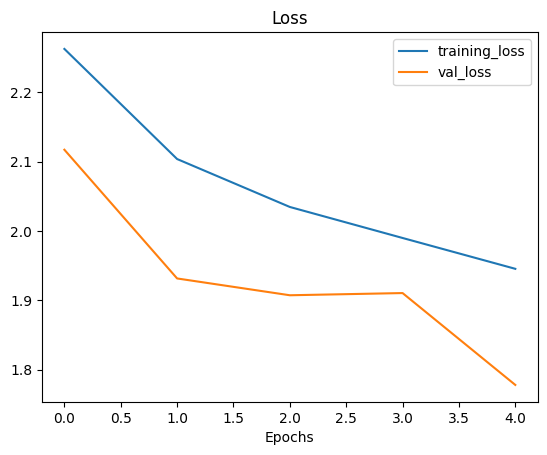

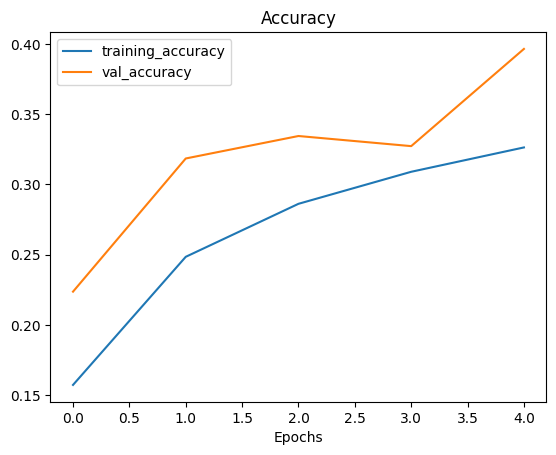

In [ ]:
plot_loss_curves(history_11)
model_11.evaluate(test_data)

## Make prediction

In [ ]:
class_names = list(train_data_augmented.class_indices.keys())
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
     


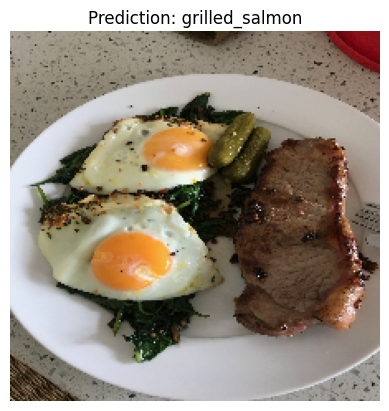

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

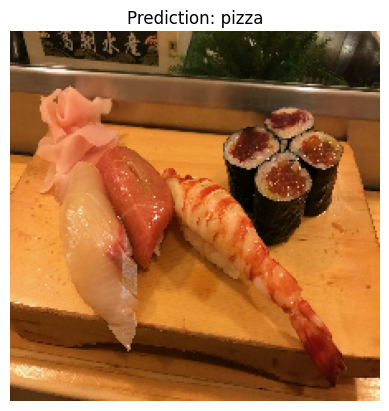

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

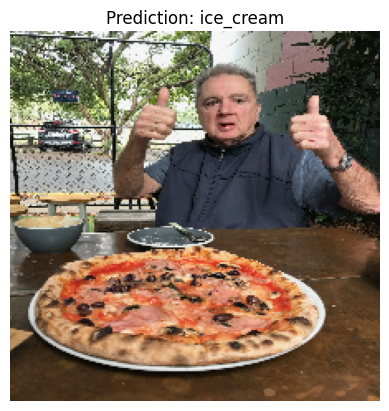

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

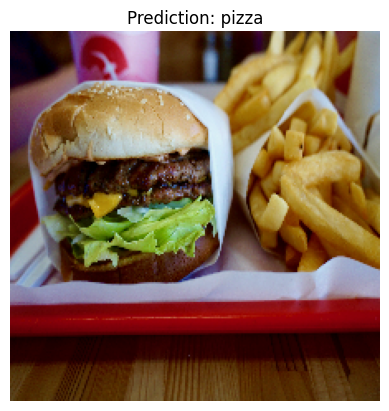

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

# Save and load model

In [ ]:

# Save a model
model_11.save("saved_trained_model")

2023-02-07 04:06:50.809609: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
model_11.save("saved_trained_model.h5")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model.h5")

In [ ]:
loaded_model_11.summary()